<a href="https://colab.research.google.com/github/HikariJadeEmpire/THNumber_img_classification/blob/main/numberclassifier.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
#pip install opencv-python

# Choose one (for Cross Validation)
#pip install pycaret
#pip install tune-sklearn ray[tune]

# STEP 1 : Importing

In [2]:

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Importing OpenCV - the computer vision library
import cv2

# import the modules - Directory management
import glob
import os

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report 

# STEP 1.1 : SET an important Variables

In [5]:
main_dir = "./Thainumber"

# STEP 2 : Preparing & inspection

Prepare for inspections

In [6]:
file_path_all = list( glob.glob( main_dir + '/**/*.png' ) )

In [7]:
labels = list( map(lambda x: os.path.split( os.path.split(x)[0] )[1] , file_path_all) )

filepath = pd.Series(file_path_all, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

data = pd.concat([filepath, labels], axis=1)

data = data.sample(frac=1).reset_index(drop=True)   # Return a random sample of items from an axis of object.
data

,Filepath,Label
0,./Thainumber\6\IMG_0917.png,6
1,./Thainumber\4\4-5.png,4
2,./Thainumber\5\5-25.png,5
3,./Thainumber\0\IMG_0959.png,0
4,./Thainumber\4\4-2.png,4
...,...,...
295,./Thainumber\5\IMG_0909.png,5
296,./Thainumber\2\IMG_0873.png,2
297,./Thainumber\3\3-21.png,3
298,./Thainumber\5\IMG_0902.png,5


In [8]:
data.shape

(300, 2)

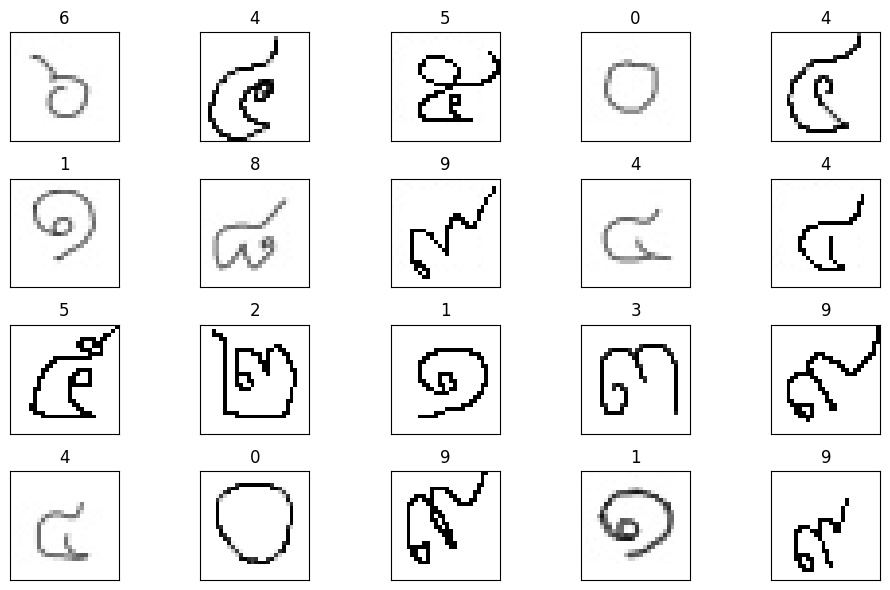

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10,6), subplot_kw = {'xticks':[],'yticks':[]} )

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Counts')

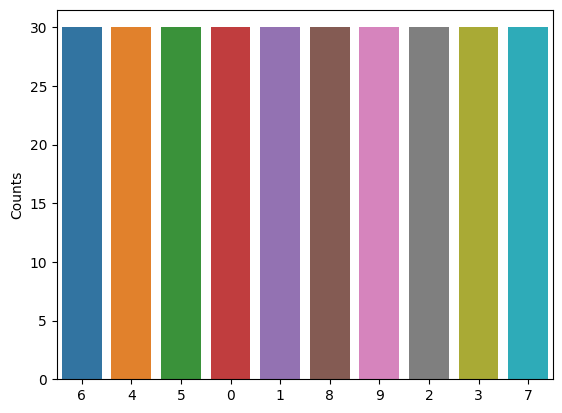

In [10]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.ylabel('Counts')

Prepare for Training

In [11]:
# Prepare X and Y

Before_x = data['Filepath']
y = data['Label']

# To work with X, we need to flatten the images first.
read_x = []

for i in Before_x :
    img_arr = cv2.imread(i)
    img_arr = img_arr.flatten()
    read_x.append(img_arr)

x = np.asarray(read_x)

In [12]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)

In [13]:
df = pd.concat([x,y] , axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,Label
0,255,255,255,252,252,252,255,255,255,253,...,255,255,255,255,255,255,255,255,255,6
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,4
2,253,253,253,255,255,255,251,251,251,255,...,255,255,255,255,255,255,255,255,255,5
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,4


In [14]:
# Binarize the output

y = preprocessing.label_binarize( y , classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] )
#print(y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size = 0.30, random_state = 42, stratify = y )

# STEP 3 : Train 

<h4>Cross Validation : AutoML </h4>
By : Pycaret

In [16]:
from pycaret.classification import *

s = setup( df, target = 'Label', session_id = 123, train_size = 0.7  )

In [17]:
best = s.compare_models( sort = 'Accuracy', fold = 5, n_select = 5 )
pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6000,0.9051,0.6000,0.5892,0.5711,0.5559,0.5629,1.762
et,Extra Trees Classifier,0.6000,0.8982,0.6000,0.6042,0.5840,0.5551,0.5611,1.790
lr,Logistic Regression,0.5905,0.9073,0.5905,0.6182,0.5744,0.5446,0.5519,2.834
svm,SVM - Linear Kernel,0.5667,0.0000,0.5667,0.5759,0.5287,0.5195,0.5352,1.530
lightgbm,Light Gradient Boosting Machine,0.5000,0.8496,0.5000,0.5629,0.4862,0.4450,0.4526,2.080
nb,Naive Bayes,0.4429,0.6913,0.4429,0.5004,0.4166,0.3818,0.3970,2.810
ridge,Ridge Classifier,0.4333,0.0000,0.4333,0.4787,0.4269,0.3700,0.3767,1.542
gbc,Gradient Boosting Classifier,0.4238,0.8081,0.4238,0.4471,0.4060,0.3603,0.3675,6.528
lda,Linear Discriminant Analysis,0.4000,0.7730,0.4000,0.4107,0.3729,0.3333,0.3407,1.636
knn,K Neighbors Classifier,0.3333,0.7548,0.3333,0.3971,0.3181,0.2596,0.2689,2.108


In [18]:
print(best)

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), LogisticRegression

In [19]:
tuned_model = tune_model( best[0], optimize = 'Accuracy', n_iter = 30, fold = 5 )

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:05:53
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6190,0.8713,0.6190,0.6873,0.6174,0.5776,0.5861
1,0.5476,0.9435,0.5476,0.4970,0.5114,0.4972,0.5035
2,0.6190,0.8804,0.6190,0.6048,0.5917,0.5763,0.5837
3,0.5714,0.8726,0.5714,0.6060,0.5653,0.5242,0.5296
4,0.5952,0.9014,0.5952,0.5381,0.5548,0.5501,0.5557
Mean,0.5905,0.8938,0.5905,0.5866,0.5681,0.5451,0.5517
Std,0.0278,0.0270,0.0278,0.0652,0.0357,0.0309,0.0317


Fitting 5 folds for each of 30 candidates, totalling 150 fits


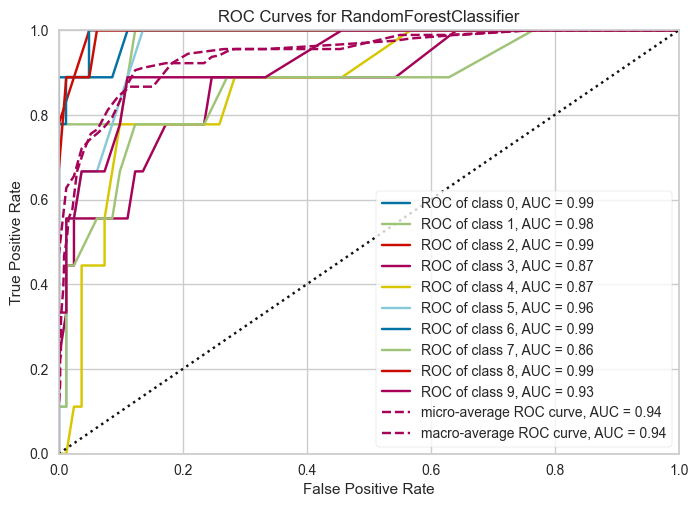

In [20]:
plot_model(tuned_model, plot = 'auc')

<h4>Pipeline</h4>

In [21]:
steps = [
    ('scalar', MinMaxScaler()),
    ('PCA', PCA( n_components=2 ) ),
    ('Randomforest',RandomForestClassifier( max_depth = None , random_state = 123 ))
]

pipeline = Pipeline(steps)

In [22]:
pr = pipeline.fit(X_train, y_train)

print('Training score: {}'.format(pipeline.score(X_train, y_train)))

Training score: 1.0


# STEP 4 : Test

In [23]:
y_pred = pr.predict(X_test)

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.11      0.20         9
           1       0.50      0.22      0.31         9
           2       0.33      0.11      0.17         9
           3       0.00      0.00      0.00         9
           4       0.33      0.11      0.17         9
           5       0.00      0.00      0.00         9
           6       0.11      0.11      0.11         9
           7       0.67      0.22      0.33         9
           8       0.00      0.00      0.00         9
           9       0.25      0.11      0.15         9

   micro avg       0.27      0.10      0.15        90
   macro avg       0.32      0.10      0.14        90
weighted avg       0.32      0.10      0.14        90
 samples avg       0.10      0.10      0.10        90



<h4>Evaluations</h4>